# **Title :** End to End Machine Learning Project for **Heart Disease Prediction**

# 1.0 About Author
**Project:** Heart Disease Prediction <br>
**Author:** Muhammad Hanzla <br>
**Code Submission Date:** 02-Feb-2026 <br>
**Author's Contact Info:** <br>
   [Email](mailto:muhammadhanzlaaltaf@gmail.com) <br>
   [Kaggle](https://www.kaggle.com/muhammadhanzla1234) <br>
   [Linkedin](https://www.linkedin.com/in/muhammad-hanzla-17a79237a/overlay/about-this-profile/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base%3BXZVL79YzTWCLRumjJpyHFQ%3D%3D) <br>
   [Instagram](https://www.instagram.com/m.hanzlaaltaf/?hl=en) <br>
   [Github](https://github.com/muhammadhanzlaaltaf)

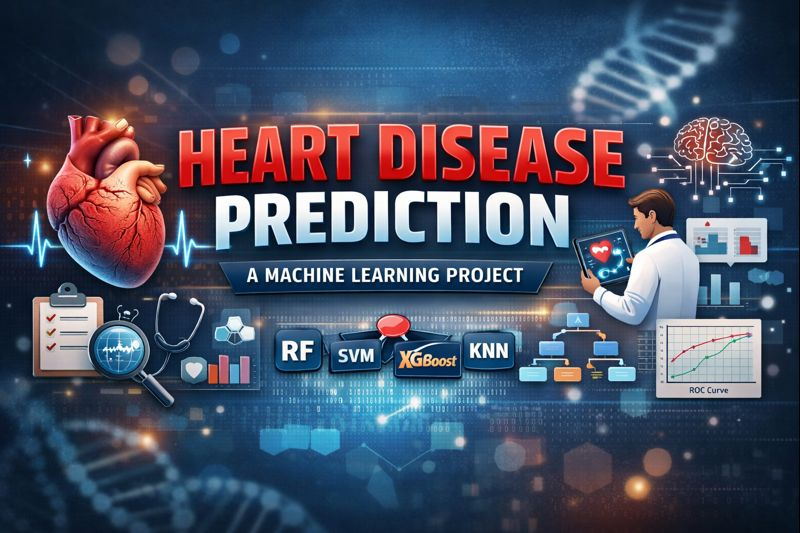

# 2.0 Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content
### Column Descriptions:
- `id` (Unique id for each patient)
- `age` (Age of the patient in years)
- `origin` (place of study)
- `sex` (Male/Female)
- `cp` chest pain type 
     1. typical angina
     2. atypical angina
     3. non-anginal
     4. asymptomatic
- `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- `chol` (serum cholesterol in mg/dl)
- `fbs` (if fasting blood sugar > 120 mg/dl)
- `restecg` (resting electrocardiographic results)
- -- `Values`: [normal, stt abnormality, lv hypertrophy]
- `thalach`: maximum heart rate achieved
- `exang`: exercise-induced angina (True/ False)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment
- `ca`: number of major vessels (0-3) colored by fluoroscopy
- `thal`: [normal; fixed defect; reversible defect]
- `num`: the predicted attribute
- 
## Acknowledgements
### Creators:
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
### Relevant Papers:
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.

- David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 

### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.
**They would be:**

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# 3.0 Aims and Objectives

### Project Aim
To build and optimize a **high-accuracy machine learning model** for heart disease prediction by improving data quality, feature processing, and model selection.

### Objectives
- Perform **focused EDA** to identify the most influential clinical features.
- Apply **advanced imputation techniques** (*IterativeImputer, KNNImputer*) for missing values in `ca` and `thal`.
- Prepare data using **standardization and categorical encoding** for optimal learning.
- Benchmark **10+ classification models** to identify the best performer.
- Improve accuracy using **hyperparameter tuning** and **5-fold cross-validation**.
- Evaluate models using **Accuracy, Precision, and Recall**, with emphasis on reducing **false negatives**.


# 4.0 import Libraries


In [1]:
# importing librries

# 1. To handle the data
import pandas as pd
import numpy as np

# 2. To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder , OneHotEncoder 
from sklearn.impute import SimpleImputer , KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 4. machine learning 
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV , cross_val_score
# for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# Metrics
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report ,mean_absolute_error ,  r2_score , root_mean_squared_error
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# 5.0 Load the Dataset

In [2]:
df=pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 6.0 Exploratory Data Analysis (EDA)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.shape

(920, 16)

## 6.1 Explore Each Column

### 6.1.1 id column

In [5]:
df['id'].min() , df['id'].max()

(1, 920)

### 6.1.2 age column

In [6]:
df['age'].min() , df['age'].max()


(28, 77)

<Axes: xlabel='age', ylabel='Count'>

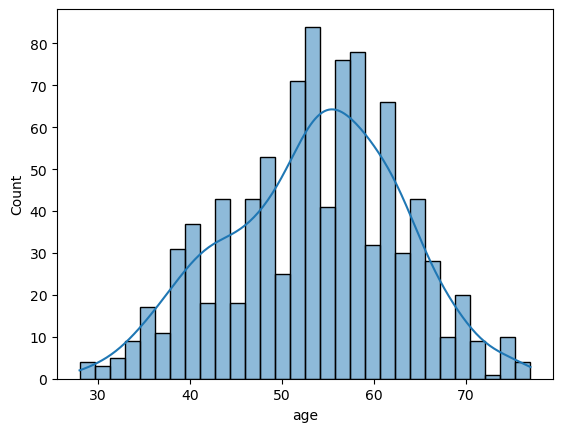

In [7]:
# Draw a histogram of age column to see the distribution of age
sns.histplot(data=df , x='age' , bins=30 , kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


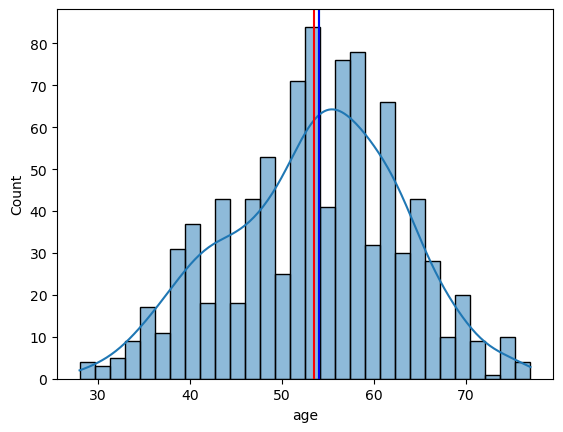

In [8]:
# plot the mean , median and mode of age column using sns
sns.histplot(df['age'], bins=30, kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean , median and mode of age column
print("Mean:", df['age'].mean())
print("Median:", df['age'].median())
print("Mode:", df['age'].mode()[0])

### 6.1.3 sex vs age

In [9]:
# plot the histogram of age column using plotly and coloring this by sex
fig= px.histogram(data_frame=df ,x='age',color='sex')
fig.show()

In [10]:
# find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [11]:
# calculate the percentages of male and female value counts in the data
male_count = 726/len(df) * 100
female_count = 194/len(df) * 100
print (f"Male Percentage:{male_count:.2f} %")
print (f"Female Percentage:{female_count:.2f} %")
percentage_differ=(male_count-female_count)/female_count * 100
print(f"Males are {percentage_differ:.2f}% more then females in the data")

Male Percentage:78.91 %
Female Percentage:21.09 %
Males are 274.23% more then females in the data


In [12]:
# find the value counts of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

### 6.1.4 dataset column

In [13]:
# Let's deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [14]:
# find unique values count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

### 6.1.5 sex vs dataset

In [15]:
# value counts of dataset column grouped by sex
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

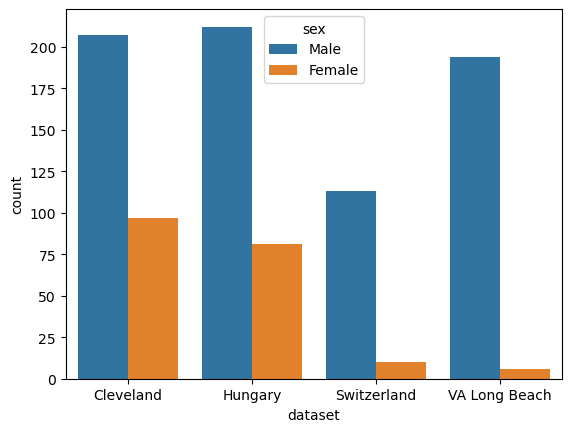

In [16]:
# plot the countplot of dataset column
sns.countplot(data=df , x='dataset' , hue='sex')
# make  a count plot using plotly 
fig=px.bar(df , x='dataset' , color='sex')
fig.show()

### 6.1.6 age vs dataset

In [17]:
# Make a plot of age column using plotly and colouring this by dataset column
fig=px.histogram(data_frame=df ,x='age',color='dataset')
fig.show()

# print the mean , median and mode of age column grouped by dataset column
print("Mean of Data Set :" , df.groupby('dataset')['age'].mean())
print('-------------------------')
print("Median of Data Set :" , df.groupby('dataset')['age'].median())
print('-------------------------')
print("Mode of Data Set :" , df.groupby('dataset')['age'].agg(pd.Series.mode))
print('-------------------------')


Mean of Data Set : dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------
Median of Data Set : dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------
Mode of Data Set : dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------


### 6.1.7 CP (chest pain) Column

#### Chest Pain Types and Heart Disease Summary

- **Asymptomatic:** No typical heart-related symptoms such as chest pain, even if heart disease may be present.
- **Non-Anginal Chest Pain:** Chest discomfort not related to typical angina patterns and not necessarily triggered by physical activity.
- **Atypical Angina:** Chest pain linked to the heart but with unusual characteristics compared to classic angina symptoms.
- **Angina & Heart Disease:** Angina is a key symptom of heart disease, often caused by reduced blood supply to the heart (e.g., coronary artery disease), indicating a lack of oxygen to the heart muscle and requiring medical attention.


In [18]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

| Condition          | Count | Description                                                                 |
|--------------------|-------|-----------------------------------------------------------------------------|
| Asymptomatic       | 496   | Nearly 500 people showed no typical signs of heart problems, like chest pain |
| Non-Anginal        | 204   | About 200 people experienced chest discomfort not typical of heart issues   |
| Atypical Angina    | 174   | Heart-related symptoms that differ from classic anginal chest pain          |
| Typical Angina     | 46    | Classic chest pain commonly associated with heart disease                   |


### 6.1.8 CP vs sex

<Axes: xlabel='cp', ylabel='count'>

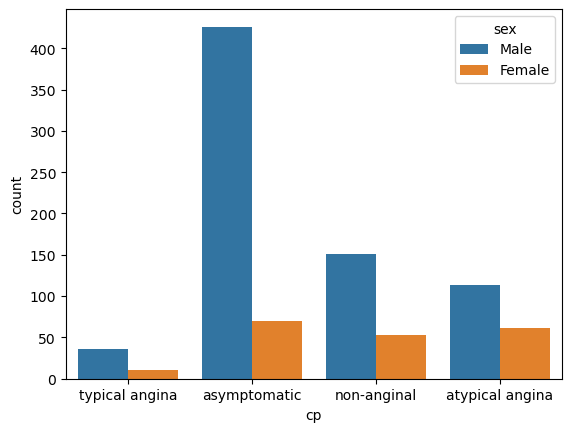

In [19]:
# count plot of cp column by sex column
sns.countplot(data=df , x='cp' , hue='sex')

### 6.1.9 cp vs age

In [20]:
# Draw the plot of age column grouped by cp column using plotly
fig=px.histogram(data_frame=df ,x='age',color='cp')
fig.show()

### 6.1.10 Tbps

The normal resting blood pressure is 120/80 mm Hg.
`Write here what will happen if the blood pressure is high or low and then you can bin the data based on those values`

In [21]:
# Find the value counts of trestbps column
df['trestbps'].describe() 

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

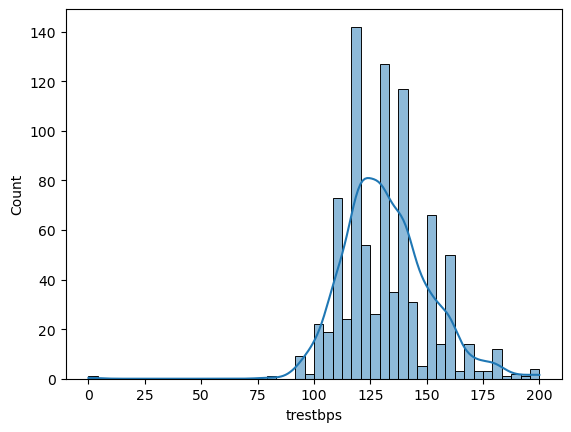

In [22]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'],kde=True)

## 6.2  Missing Values

In [23]:
(df.isnull().sum() / len(df) * 100 ).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
cp           0.000000
dataset      0.000000
id           0.000000
age          0.000000
sex          0.000000
num          0.000000
dtype: float64

### 6.2.1 Imputing Missing values by using Function

In [24]:
# Features with multiple categories (Nominal)
categorical_cols = ['dataset', 'cp', 'restecg', 'slope', 'thal']

# Features with only two possible values (Binary/Boolean)
bool_cols = ['sex', 'fbs', 'exang']

# Features with continuous or discrete numerical values
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']



In [25]:
df.isnull().sum()   

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

#### Missing Value Imputation Strategy

##### 1. Imputation for Categorical Columns

This function imputes missing values in **categorical features** using a machine learning–based approach.

**Steps:**
1. Separate rows with **missing** and **non-missing** values for the target column.
2. Extract input features (**X**) and target variable (**y**) from non-missing rows.
3. Identify other columns containing missing values for later imputation.
4. Encode categorical features using **LabelEncoder**.
5. Encode the target column if it is of **boolean** type.
6. Initialize **IterativeImputer** with **RandomForestRegressor** as the estimator.
7. Impute missing values in other columns of the dataset.
8. Split the data into **training and testing** sets.
9. Train a **RandomForestClassifier** to predict missing values in the target column.
10. Predict missing values and evaluate model **accuracy**.
11. Prepare the dataset containing missing values for final imputation.
12. Impute missing values in the target column for the original missing rows.
13. Predict missing values in the target column.
14. Merge the imputed data back into the **original dataset**.

---

### 2. Imputation for Continuous Columns

This function imputes missing values in **continuous (numerical) features** using regression-based modeling.

**Steps:**
1. Separate rows with **missing** and **non-missing** values for the target column.
2. Extract input features (**X**) and target variable (**y**) from non-missing rows.
3. Identify other columns containing missing values for later imputation.
4. Encode categorical features using **LabelEncoder**.
5. Initialize **IterativeImputer** with **RandomForestRegressor** as the estimator.
6. Impute missing values in other columns of the dataset.
7. Split the data into **training and testing** sets.
8. Train a **RandomForestRegressor** to predict missing values in the target column.
9. Predict missing values and evaluate **performance metrics**.


In [26]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

In [27]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", root_mean_squared_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [28]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data( col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.3342774566474 

RMSE = 17.051289019468104 

R2 = 0.09219571428362772 

Missing Values chol : 3.26%
MAE = 44.18848314606741 

RMSE = 63.824749131394114 

R2 = 0.6773015507334377 

Missing Values fbs : 9.78%
Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.59 accuracy

Missing Values thalch : 5.98%
MAE = 16.66115606936416 

RMSE = 21.626570496615656 

R2 = 0.31991276392641077 

Missing Values exang : 5.98%
Missing Values oldpeak : 6.74%
MAE = 0.5667848837209302 

RMSE = 0.7972823279523484 

R2 = 0.3944050825903217 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
MAE = 0.6427419354838709 

RMSE = 0.8919813031455818 

R2 = 0.15443621786010509 

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



## 6.3 Outliers

In [29]:
# Create boxplots for all numeric columns using plotly
fig = px.box(df, y=numeric_cols, points='outliers')
fig.update_layout(
    title='Boxplots of Numeric Columns',
    yaxis_title='Value',
    xaxis_title='Column',
    height=400,
    width=800
)
fig.show()

### 6.3.1 Remove trestbps outlier

In [30]:
# Print the row from df where trestdps value is 0
df[df['trestbps'] == 0]

# remove this row from the data
df=df[df['trestbps']!=0]

`tbps can never be zero so it is an outlier so i removed it`

### 6.3.2 Remove Outliers from **thalch , oldpeak , chol**

In [31]:
# remove outliers in thalch and oldpeak and chol columns using IQR method
for col in [ 'thalch', 'oldpeak' ,'chol']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



## 6.4 Correlation 

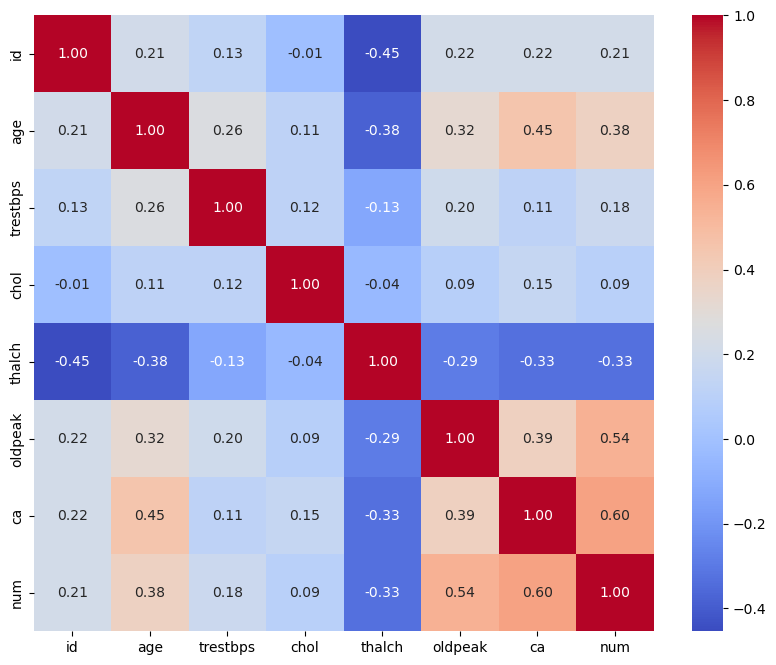

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [33]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 7.0 Machine Learning

In [34]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [35]:
df['num'].value_counts() 

num
0    386
1    196
3     67
2     62
4     21
Name: count, dtype: int64

The Target Column is 'num' which is the predicted attribute . we will use this column to predict the heart disease . 
The unique values in this column are : [0,1,2,3,4] , which states that there are 5 types of heart diseases . 
* `0 = no heart disease` <br>
* `1 = mild heart disease` <br> 
* `2 = moderate heart disease` <br>
* `3 = severe heart disease` <br>
* `4 = critical heart disease` .



## 7.1 Encoding the categorical Columns

In [36]:
# Dictionary to store encoders
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le
#perform binary encoding for bool_cols
for col in bool_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


In [37]:
Standard_scalers = {}

for col in numeric_cols:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])
    Standard_scalers[col] = scaler
    

In [38]:
df.head().transpose()

,0,1,2,3,4
id,1.000000,2.000000,3.000000,4.000000,5.000000
age,1.065500,1.486694,1.486694,-1.672261,-1.251067
sex,1.000000,1.000000,1.000000,1.000000,0.000000
dataset,0.000000,0.000000,0.000000,0.000000,0.000000
cp,3.000000,0.000000,0.000000,2.000000,1.000000
trestbps,0.691477,1.553579,-0.745359,-0.170625,-0.170625
chol,-0.201343,0.885899,-0.283399,0.147395,-0.796249
fbs,1.000000,0.000000,0.000000,0.000000,0.000000
restecg,0.000000,0.000000,0.000000,1.000000,0.000000
thalch,0.400058,-1.315511,-0.457727,1.911392,1.298689


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        732 non-null    int64  
 1   age       732 non-null    float64
 2   sex       732 non-null    int64  
 3   dataset   732 non-null    int64  
 4   cp        732 non-null    int64  
 5   trestbps  732 non-null    float64
 6   chol      732 non-null    float64
 7   fbs       732 non-null    int64  
 8   restecg   732 non-null    int64  
 9   thalch    732 non-null    float64
 10  exang     732 non-null    int64  
 11  oldpeak   732 non-null    float64
 12  slope     732 non-null    int64  
 13  ca        732 non-null    float64
 14  thal      732 non-null    int64  
 15  num       732 non-null    int64  
dtypes: float64(6), int64(10)
memory usage: 97.2 KB


## 7.2 Split the data into X and Y


In [40]:
X = df.drop(['num','id','dataset'] , axis=1)
y = df['num']


## 7.3 Split the data into train and test 

In [41]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

Enlisting all the models that you will use to predict the heart disease . These models should be classifiers for multi-class classification
1. Logistic Regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoosting
9. AdaBoost


## 7.4 Implementing the Model

In [42]:
%%time
import numpy as np, random
from sklearn.model_selection import StratifiedKFold

np.random.seed(42)
random.seed(42)

# define stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# create a function to train and evaluate all models and select the best model
# Create a list of models to evaluate
models = [
    (RandomForestClassifier(random_state=42),
        {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    ),
    (GradientBoostingClassifier(random_state=42),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    ),
    (SVC(random_state=42),
        {
            "C": [0.1, 1, 10],
            "kernel": ["rbf", "linear"],
            "gamma": ["scale", "auto"]
        }
    ),
   
    (LogisticRegression(random_state=42),
        {
            "C": [0.1, 1, 10],
            "solver": ["lbfgs", "liblinear"]
        }
    ),
    (KNeighborsClassifier(),
        {
            "n_neighbors": [3,5,7,9],
            "weights": ["uniform", "distance"]
        }
    ),
    (DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [None, 10, 20],
            "min_samples_split": [2,5]
        }
    ),
    (AdaBoostClassifier(random_state=42),
        {
            "n_estimators": [50,100,200],
            "learning_rate": [0.05,0.1,1]
        }
    ),
    (XGBClassifier(random_state=42),
        {
            "n_estimators": [100,200],
            "max_depth": [3,5],
            "learning_rate": [0.05,0.1]
        }
    ),
    (GaussianNB(),
        {}
    )
    
]
results = []
best_model = None
best_accuracy = 0.0

for model, params in models:
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    mean_accuracy = scores.mean()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        "Model": model.__class__.__name__,
        "CV_Accuracy": mean_accuracy,
        "Test_Accuracy": accuracy,
        "Model_Object": model
    })

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = (model.__class__.__name__, model)

# Sort results by Test_Accuracy in descending order
results_sorted = sorted(results, key=lambda x: x["Test_Accuracy"], reverse=True)

for res in results_sorted:
    print(f"Model: {res['Model']}")
    print(f"Cross-validation Accuracy: {res['CV_Accuracy']:.4f}")
    print(f"Test Accuracy: {res['Test_Accuracy']:.4f}\n")

print("Best Model Name:", best_model[0])


Model: SVC
Cross-validation Accuracy: 0.6479
Test Accuracy: 0.7551

Model: RandomForestClassifier
Cross-validation Accuracy: 0.6957
Test Accuracy: 0.7347

Model: LogisticRegression
Cross-validation Accuracy: 0.6427
Test Accuracy: 0.7347

Model: KNeighborsClassifier
Cross-validation Accuracy: 0.6479
Test Accuracy: 0.7347

Model: AdaBoostClassifier
Cross-validation Accuracy: 0.6325
Test Accuracy: 0.7007

Model: XGBClassifier
Cross-validation Accuracy: 0.6650
Test Accuracy: 0.6939

Model: GradientBoostingClassifier
Cross-validation Accuracy: 0.6838
Test Accuracy: 0.6735

Model: GaussianNB
Cross-validation Accuracy: 0.5846
Test Accuracy: 0.6735

Model: DecisionTreeClassifier
Cross-validation Accuracy: 0.5863
Test Accuracy: 0.6054

Best Model Name: SVC
CPU times: total: 19.9 s
Wall time: 9.07 s


**`Support Vector Classifier (SVC) achieved the highest accuracy among all models tested `**

## 7.5 Confusion Matrix

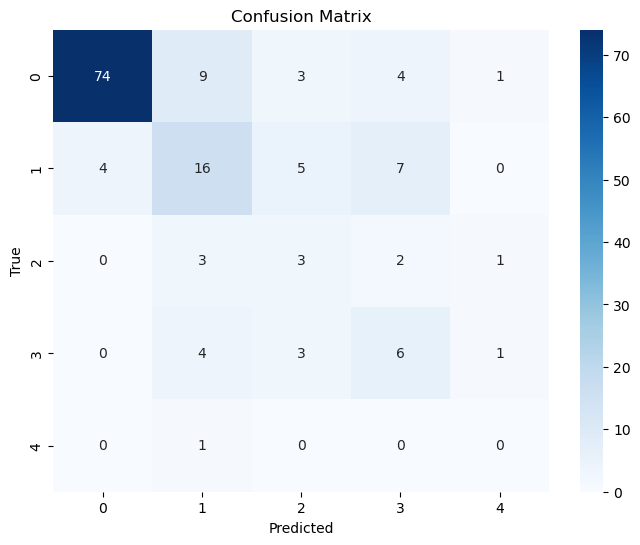

In [43]:
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## 7.6 Inverse Scaling

In [44]:
for col, scaler in Standard_scalers.items():
    # Use inverse_transform to get the original values
    df[col] = scaler.inverse_transform(df[[col]])

## 7.7 Inverse Encoding

In [45]:
# Now, to reverse encoding
for col, le in encoders.items():
    df[col] = le.inverse_transform(df[col])

In [46]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67.0,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 8.0 Outputs :
1. The minimum age to have a heart disease starts from 28 years old.
2. Most of the people get heart disease at the age of 53-54 years
3. Most of the males and females get heart disease at the age of 54-55 years
4. Male percentage in the data : 78.91%
5. Female percentage in the data : 21.09%
6. Males are 274.23% more then females in the data
7. We have highest number of people from Cleveland (304) and lowest from Switzerland (123)
   1. The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6)
   2. The highest numbers of males in this dataset are from Hungary (212) and lowest from switzerland (113)
8. `Write down the observations here about mean , median and mode of age column  grouped by dataset column`
   1. Mean of the dataset 
       Cleveland is 54.351974 ,
       Hungary is 47.894198 , 
       Switzerland is 55.317073 ,
       VA Long Beach is 59.350000.
   2. Median of the dataset 
       Cleveland is 55.5 ,
       Hungary is 49.0 , 
       Switzerland is 56.0 ,
       VA Long Beach is 60.0.
   3. Mode of the dataset 
       Cleveland is 58 ,
       Hungary is 54 , 
       Switzerland is 61 ,
       VA Long Beach is [62, 63].


# 9.0 Conclusion

**Best Model:**  
The **Support Vector Classifier (SVC)** showed the best overall performance, effectively capturing non-linear patterns and complex feature interactions in the dataset.

**Key Features:**  
Important predictors include **age**, **cholesterol (chol)**, **maximum heart rate (thalach)**, **resting blood pressure (trestbps)**, and **chest pain type (cp)**.

**Limitations:**  
The dataset is relatively small and may suffer from class imbalance. Evaluation primarily relied on accuracy, which may not fully capture medical risk.

**Future Work:**  
Future improvements include **hyperparameter tuning**, incorporating additional metrics like **ROC-AUC and recall**, applying **model explainability methods (SHAP)**, and deploying the SVC model using **Flask** or **FastAPI**.


***`Final Model Selected: SVC`*** <br>
**Reason:** Achieved the highest accuracy and demonstrated consistent performance on unseen data.
